In [1]:
using MAT

In [2]:
DatosAparato=matopen("../Actividad4AP/actividad_epileptica.mat")
matread("../Actividad4AP/actividad_epileptica.mat");

In [3]:
chururu=read(DatosAparato, "Ch37_55")

1x28088 Array{Float64,2}:
 -4.02832  16.1133  6.04248  -6.04248  …  -4.02832  10.0708  -4.02832

In [4]:
using PyPlot

INFO: Loading help data...


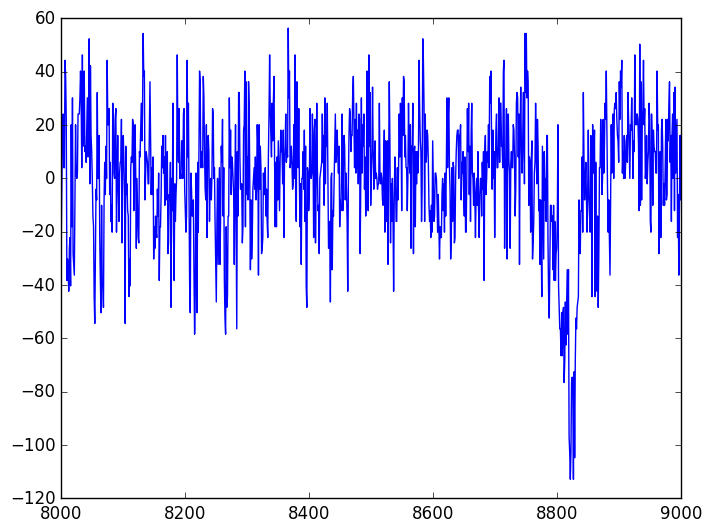

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f576c50fc18>

In [5]:
ion()
tint=8000:9000
plot(tint, chururu[tint])  

In [4]:
Esquina=zeros(9,9,28088);
for j=1:9, k=1:9
    pseudostring="Ch0$j\_0$k"
    Esquina[j,k,:]=read(DatosAparato, pseudostring)
end

In [6]:
TodosLosDatos=zeros(64,64,28088);

In [7]:
TodosLosDatos[32,45,1030]

0.0

In [8]:
for j=1:64, k=1:64
    if((j<10)&&(k<10))
        pseudostring="Ch0$j\_0$k"
    elseif((j<10)&&(k>=10))
        pseudostring="Ch0$j\_$k"
    elseif((j>=10)&&(k<10))
        pseudostring="Ch$j\_0$k"
    else
        pseudostring="Ch$j\_$k"
    end
    TodosLosDatos[j,k,:]=read(DatosAparato, pseudostring)
end

In [12]:
function SigmaVentanas(Datos, ancho, paso)
    anchomedio=floor(ancho/2)
    tantos=convert(Int, floor((length(Datos)-ancho)/paso))
    result=zeros(tantos)
    for t=1:tantos
        result[t]=std(Datos[(t-1)*paso+1:(t-1)*paso+ancho])
    end
    return result  
end

SigmaVentanas (generic function with 1 method)

In [13]:
ancho=350
paso=35
tmax=28088
cuantasventanas=convert(Int, floor((tmax-ancho)/paso))
DesviacionPorVentana=zeros((64,64,cuantasventanas))
for j=1:64, k=1:64
    chorizo=reshape(TodosLosDatos[j,k,:],tmax)
    DesviacionPorVentana[j,k,:]=SigmaVentanas(chorizo, ancho, paso)
end

In [9]:
Cuaracuaca=zeros(cuantasventanas)
for t=1:cuantasventanas
    Cuaracuaca[t]=std(DesviacionPorVentana[:,:,t])
end

LoadError: cuantasventanas not defined
while loading In[9], in expression starting on line 1

In [11]:
using PyPlot

INFO: Loading help data...


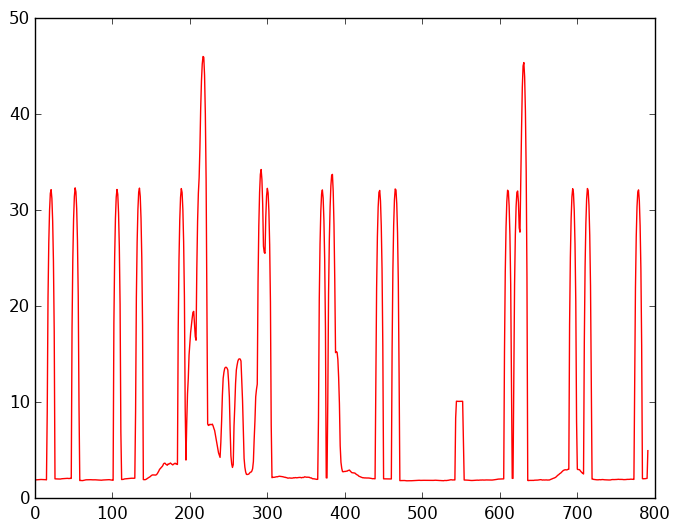

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4e7615ad10>

In [12]:
plot(Cuaracuaca, "r-")

In [10]:
DatosSelectos=TodosLosDatos[:,:,80*paso:370*paso]

LoadError: paso not defined
while loading In[10], in expression starting on line 1

In [13]:
function OtsuMethod(Data)
    #Pa que esto funcione hay que mandar los datos ya sin NaNs u otras mugres   
    binsdefault=2*ceil(Int,sqrt(length(Data)))
    (rango, cuentas)=hist(Data,binsdefault)
    tantos=length(rango)
    valores
    omega1=0
    omega2=0
    mu1=0
    mu2=0
    sigmab=0
    sigmabtemp=0
    tbest=0
    varlim=0
    for t=1:tantos-1
        omega1=sum(cuentas[1:t])
        omega2=sum(cuentas[t+1:tantos-1])
        mu1=sum(cuentas[1:t].*rango[1:t])/omega1
        mu2=sum(cuentas[t+1:tantos-1].*rango[t+1:tantos-1])/omega2        
        sigmabtemp=omega1*omega2*((mu1-mu2)^2)
        if sigmabtemp>sigmab
            sigmab=sigmabtemp
            tbest=t
            varlim=rango[t]
        end
    end
    return (sigmab,tbest,varlim)
end

function OtsuUmbralizar(DatosMatriz)
    # aplanar datos
    DataFlatten=reshape(DatosMatriz, size(DatosMatriz)[1]*size(DatosMatriz)[2])
    mascara=zeros(DatosMatriz)
    umbral=OtsuMethod(DataFlatten)[3]
    mascara=map(x->(x>umbral)?1:0, DatosMatriz)
    return mascara
end


OtsuUmbralizar (generic function with 1 method)

In [ ]:
plot

In [14]:
SumaVentanasOtsuUmbral=zeros(64,64)
for t=1:cuantasventanas
    SumaVentanasOtsuUmbral+=OtsuUmbralizar(DesviacionPorVentana[:,:,t])
end

In [15]:
writedlm("SumaOtsu02.dat", SumaVentanasOtsuUmbral)

In [17]:
writedlm("DatosTotalesActividadEpilectica.dat", TodosLosDatos)

In [14]:
chanfles=open("DatosActividadEpilepticaSelectos.bin", "w")
write(chanfles, DatosSelectos)
close(chanfles)